In [1]:
cd /home/g.samarth/globalHelioseismology/

/home/g.samarth/globalHelioseismology


In [2]:
import globalHelioseismology as GH

In [6]:
cs = GH.spectra.crossSpectra(0, 235, 0, 237, 0)
#csp, csn, varp, varn, bslp_coeffs, bsln_coeffs = cs.store_cross_spectra()
#bslp, bsln = cs.get_baseline_from_coeffs(bslp_coeffs, bsln_coeffs)

freqmin = 1352.2278725092522; freqmax = 1742.6892969416076
Reading /scratch/seismogroup/data/HMI/data/HMI_235_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_237_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_235_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_237_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_235_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_237_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_235_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_237_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_235_6616.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_237_6616.fits
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/csp_data_00.235-00.237-000.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/csm_data_00.235-00.237-000.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/variance_p_00.235-00.237-000.npy
Saving /scratch/g.samarth/globalHelioseismology/csdata_00/vari

'/home/g.samarth/globalHelioseismology'

In [7]:
#%run cs_data.py --n1 0 --n2 0 --l1 235 --l2 237
%run cs_data.py --n1 5 --n2 5 --l1 65 --l2 65 --t 2
#%run cs_data.py --n1 0 --n2 0 --l1 235 --l2 239

freqmin = 2164.657695103375; freqmax = 2426.5192267626203
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6328.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6400.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6472.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6544.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6616.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6688.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6760.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6832.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6904.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_6976.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_7048.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_7120.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_7192.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_7264.fits
Reading /scratch/seismogroup/data/HMI/data/HMI_065_7336.fits
Saving /scratch/g.samarth/g

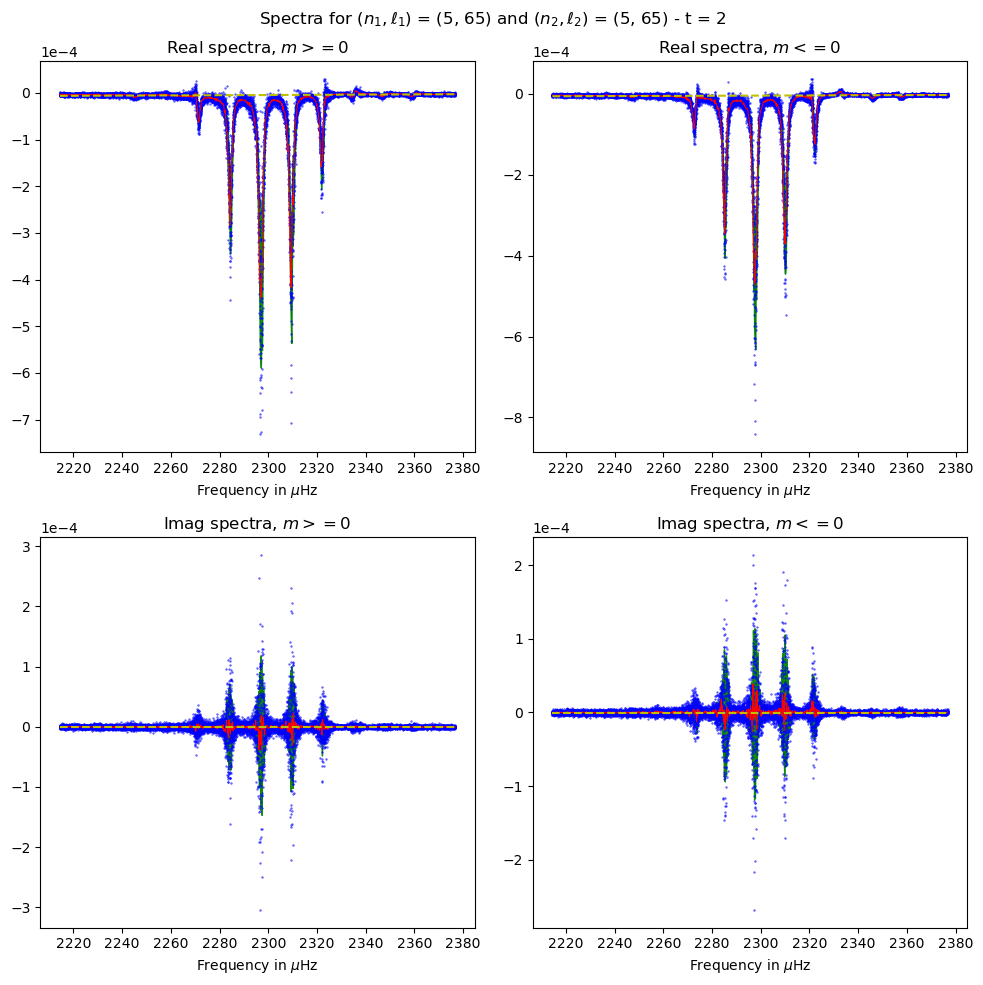

In [8]:
cs.fig

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
axs = axs.flatten()
axs[0].plot(cs.freq_p[0], csp.real, alpha=0.5, color='k')
axs[0].fill_between(cs.freq_p[0], csp.real-50*varp.real, csp.real+50*varp.real, alpha=0.7, color='red')
axs[0].plot(cs.freq_p[0], bslp.real, '--b')

axs[1].plot(cs.freq_p[0], csp.imag, alpha=0.5, color='k')
axs[1].fill_between(cs.freq_p[0], csp.imag-50*varp.imag, csp.imag+50*varp.imag, alpha=0.7, color='red')
axs[1].plot(cs.freq_p[0], bslp.imag, '--b')

plt.show()

In [ ]:
bslp.shape

In [ ]:
varp.shape

In [ ]:
n1, ell1 = 0, 230
n2, ell2 = n1, ell1+2
t = 0
ell2_arr = np.array([ell1, ell1+2, ell1+4])
for ell2 in ell2_arr:
    for t in range(8):
        cs = GH.spectra.crossSpectra(n1, ell1, n2, ell2, t)

In [ ]:
csp, csn, varp, varn = cs.compute_cross_spectra()

In [ ]:
plt.figure()
plt.plot(csp.real.sum(axis=0))
plt.plot(csp.imag.sum(axis=0))
plt.show()

In [ ]:
cs.find_baseline_coeffs(csp, csn)

In [ ]:
if abs(t)>0:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}_{abs(t):03d}.npy"
else:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}.npy"
csp = np.load(f"/scratch/g.samarth/globalHelioseismology/csdata_{n1:02d}/csp_data_{suffix}")
freqp = cs.freq_p[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(freqp, abs(csp.real).sum(axis=0), label='$\sum_m |S_m|$')
axs[0].plot(freqp, csp.real.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[0].set_xlabel('Frequency in microHz')
axs[0].set_title(f'Real(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[0].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[0].set_aspect(1.0/axs[0].get_data_ratio())
axs[0].legend()

axs[1].plot(freqp, abs(csp.imag).sum(axis=0), label='$\sum_m |S_m|$')
axs[1].plot(freqp, csp.imag.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[1].set_xlabel('Frequency in microHz')
axs[1].set_title(f'Imag(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[1].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[1].set_aspect(1.0/axs[1].get_data_ratio())
axs[1].legend()

fac = 5.
vmaxr, vminr = csp.real.max()/fac, csp.real.min()/fac
vmaxi, vmini = csp.imag.max()/fac, csp.imag.min()/fac
freqdiff = freqp.max() - freqp.min()
aspectrat = freqdiff/ell1
axs[2].imshow(csp.real, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, ell1], interpolation='bessel')
axs[2].set_xlabel('Frequency in microHz')
axs[2].set_ylabel('m')

axs[3].imshow(csp.imag, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, ell1], interpolation='bessel')
axs[3].set_xlabel('Frequency in microHz')
axs[3].set_ylabel('m')
plt.tight_layout()
plt.show()

In [ ]:
if abs(t)>0:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}_{abs(t):03d}.npy"
else:
    suffix = f"{n1:02d}.{ell1:03d}-{n2:02d}.{ell2:03d}.npy"
csn = np.load(f"/scratch/g.samarth/globalHelioseismology/csdata_{n1:02d}/csm_data_{suffix}")
freqp = cs.freq_n[0]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(freqp, abs(csn.real).sum(axis=0), label='$\sum_m |S_m|$')
axs[0].plot(freqp, csn.real.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[0].set_xlabel('Frequency in microHz')
axs[0].set_title(f'Real(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[0].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[0].set_aspect(1.0/axs[0].get_data_ratio())
axs[0].legend()

axs[1].plot(freqp, abs(csn.imag).sum(axis=0), label='$\sum_m |S_m|$')
axs[1].plot(freqp, csn.imag.sum(axis=0), 'r', label='$\sum_m S_m$')
axs[1].set_xlabel('Frequency in microHz')
axs[1].set_title(f'Imag(cs) nl1=({n1}, {ell1}), nl2=({n2}, {ell2}), t={t}')
axs[1].ticklabel_format(axis='y', style='sci', useOffset=False)
axs[1].set_aspect(1.0/axs[1].get_data_ratio())
axs[1].legend()

fac = 5.
vmaxr, vminr = csp.real.max()/fac, csp.real.min()/fac
vmaxi, vmini = csp.imag.max()/fac, csp.imag.min()/fac
freqdiff = freqp.max() - freqp.min()
aspectrat = freqdiff/ell1
axs[2].imshow(csp.real, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, -ell1], interpolation='bessel')
axs[2].set_xlabel('Frequency in microHz')
axs[2].set_ylabel('m')

axs[3].imshow(csp.imag, cmap='gray', aspect=aspectrat, vmax=vmaxi, vmin=vmini,
             extent=[freqp.min(), freqp.max(), 0, -ell1], interpolation='bessel')
axs[3].set_xlabel('Frequency in microHz')
axs[3].set_ylabel('m')
plt.tight_layout()
plt.show()